# Misure dirette di velocità del suono

## correlazione temporale

In [1]:
import numpy as np

#from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [2]:
import sympy
sympy.init_printing()

In [3]:
from IPython.display import Image

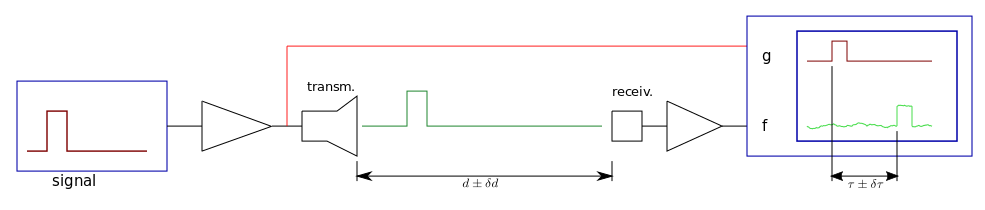

In [4]:
Image("./img/soundspeed.png")

## Correlazione di segnali:

$$F(\tau) = \int f(t) g(t+\tau) dt$$

## Convoluzione di segnali:

$$F(\tau) = \int f(t) g(t-\tau) dt$$

# Esempio

In [101]:
t, τ = sympy.symbols('t \\tau')

In [103]:
#f = sympy.Heaviside(t+sympy.Rational(1,2))-sympy.Heaviside(t-sympy.Rational(1,2))
#g = sympy.Heaviside((t+τ)-sympy.Rational(3,2))-sympy.Heaviside((t+τ)-sympy.Rational(5,2))
f = sympy.Piecewise((0,t<-sympy.Rational(1,2)),(1,t<sympy.Rational(1,2)),(0,True))
g = sympy.Piecewise((0,t<sympy.Rational(3,2)),(1,t<sympy.Rational(5,2)),(0,True))

In [104]:
tplot = np.linspace(-5,5,500)
fplot = np.zeros_like(tplot)
gplot = np.zeros_like(tplot)

for i,ti in enumerate(tplot):
    fplot[i] = f.evalf(subs={t:ti})
    gplot[i] = g.evalf(subs={t:ti, τ:0})

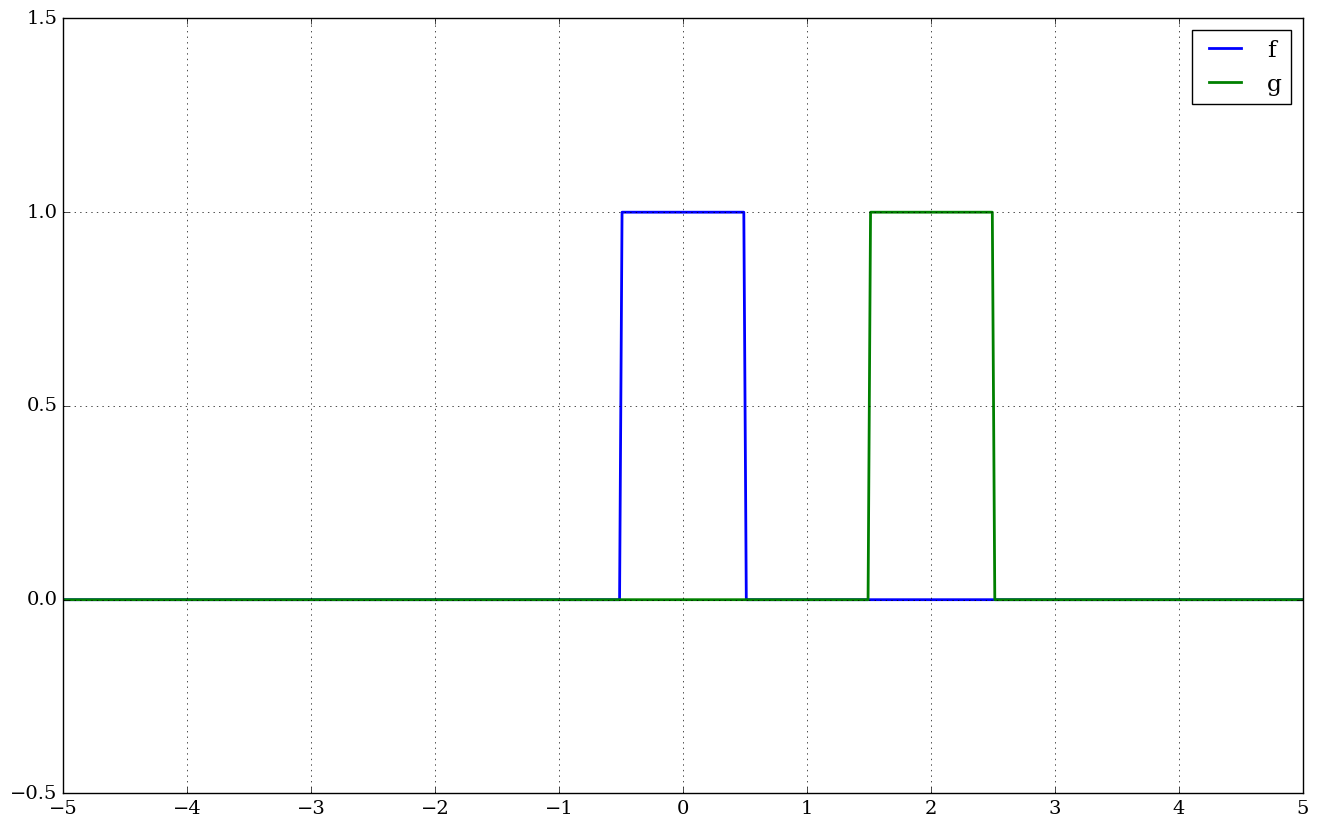

In [105]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(tplot,fplot,lw=2,label='f')
plt.plot(tplot,gplot,lw=2,label='g')
plt.xlim([-5,5])
plt.xticks(range(-5,6))
plt.ylim([-0.5,1.5])
plt.legend()
plt.grid()

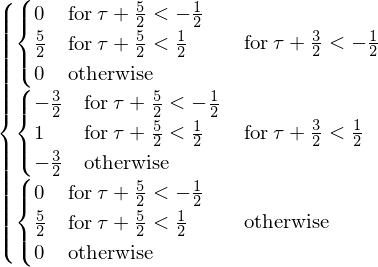

In [111]:
Fcor = sympy.integrate(f.subs(t,t+τ,simultaneous=True)*g,(t,-5,5))
Fcor

In [112]:
Fcplot = np.zeros_like(tplot)


for i,ti in enumerate(tplot):
    Fcplot[i] = Fcor.evalf(subs={τ:ti})

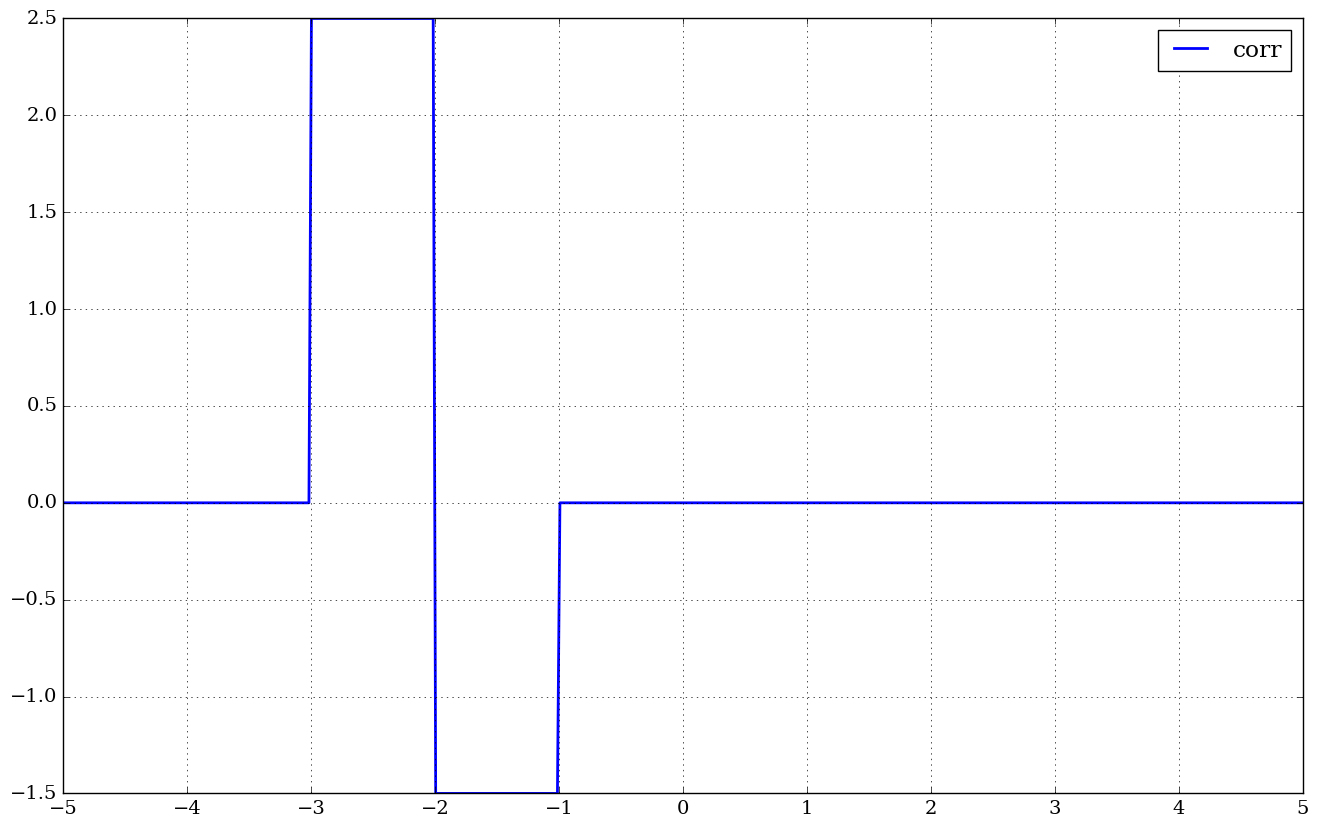

In [114]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(tplot,Fcplot,lw=2,label='corr')
plt.xlim([-5,5])
plt.xticks(range(-5,6))
#plt.ylim([-0.5,1.5])
plt.legend()
plt.grid()

Piecewise